In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import TensorFlow and its submodules
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint



In [ ]:
from google.colab import files
files.upload()
# The 'files.upload()' function allows users to upload files interactively in a Google Colab environment.

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vamshikrishnasunnam","key":"5af6648a4fe664fe8c08ce73a5927dbb"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 789M/812M [00:07<00:00, 222MB/s]
100% 812M/812M [00:07<00:00, 118MB/s]


In [ ]:
#Downloading the data set from the kaggle cometition environment
!kaggle competitions  download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzipping the file
!unzip -qq dogs-vs-cats.zip


In [ ]:
#Unzipping the file
!unzip -qq train.zip

In [ ]:
# Import necessary libraries
import os
import shutil
import pathlib

# Define the original directory containing the training data
original_dir = pathlib.Path("train")

# Define the new base directory where you want to create subsets of the data
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Function to create a subset of data
def make_subset(subset_name, start_index, end_index):
    # Loop through categories ("cat" and "dog")
    for category in ("cat", "dog"):
        # Create a directory for the current category within the subset
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)

        # Generate a list of filenames for the current category and index range
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

        # Copy the selected files from the original directory to the subset directory
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Create subsets of the data using the make_subset function
make_subset("train", start_index=0, end_index=500)         # Create a training subset
make_subset("validation", start_index=1000, end_index=1250)  # Create a validation subset
make_subset("test", start_index=1500, end_index=1750)       # Create a test subset


In [ ]:
# Create a training dataset from the "train" directory
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",  # Directory containing the training data
    image_size=(180, 180),    # Resize images to 180x180 pixels
    batch_size=32             # Batch size for training dataset
)

# Create a validation dataset from the "validation" directory
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",  # Directory containing the validation data
    image_size=(180, 180),        # Resize images to 180x180 pixels
    batch_size=32                 # Batch size for validation dataset
)

# Create a test dataset from the "test" directory
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",  # Directory containing the test data
    image_size=(180, 180),   # Resize images to 180x180 pixels
    batch_size=32            # Batch size for test dataset
)



Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Iterate through the training dataset to extract batches of data and labels
for data_batch, labels_batch in train_dataset:
    # Print the shape of the data batch
    print("data batch shape:", data_batch.shape)

    # Print the shape of the labels batch
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

In [ ]:
# Fitting/Running the Model
Model_1 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks = callbacks)

Epoch 1/30
32/32 [==============================] - 13s 178ms/step - loss: 0.7019 - accuracy: 0.4970 - val_loss: 0.6929 - val_accuracy: 0.5080
Epoch 2/30
32/32 [==============================] - 3s 88ms/step - loss: 0.6917 - accuracy: 0.5150 - val_loss: 0.6878 - val_accuracy: 0.6000
Epoch 3/30
32/32 [==============================] - 3s 89ms/step - loss: 0.6862 - accuracy: 0.5600 - val_loss: 0.6624 - val_accuracy: 0.6280
Epoch 4/30
32/32 [==============================] - 2s 58ms/step - loss: 0.6576 - accuracy: 0.6220 - val_loss: 0.7366 - val_accuracy: 0.5140
Epoch 5/30
32/32 [==============================] - 6s 165ms/step - loss: 0.6446 - accuracy: 0.6450 - val_loss: 0.6487 - val_accuracy: 0.6260
Epoch 6/30
32/32 [==============================] - 3s 91ms/step - loss: 0.5960 - accuracy: 0.6890 - val_loss: 0.6392 - val_accuracy: 0.6340
Epoch 7/30
32/32 [==============================] - 2s 58ms/step - loss: 0.5951 - accuracy: 0.7010 - val_loss: 0.6599 - val_accuracy: 0.6160
Epoch 8/30

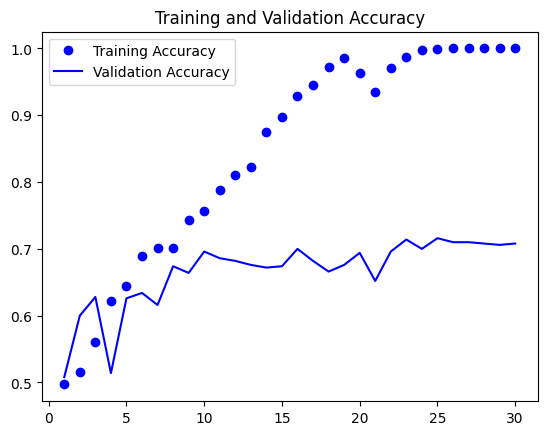

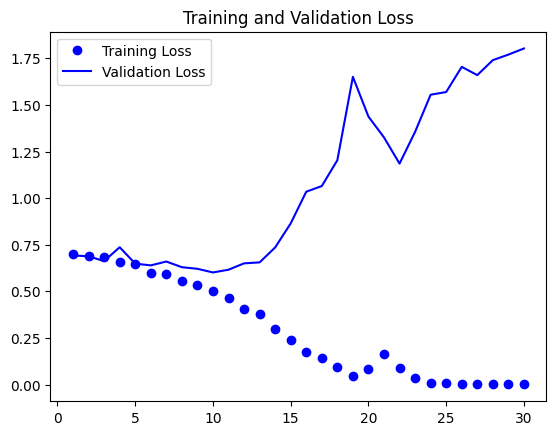

In [ ]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")


16/16 [==============================] - 2s 40ms/step - loss: 0.6428 - accuracy: 0.6500
Loss: 0.643
Test accuracy: 0.650


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

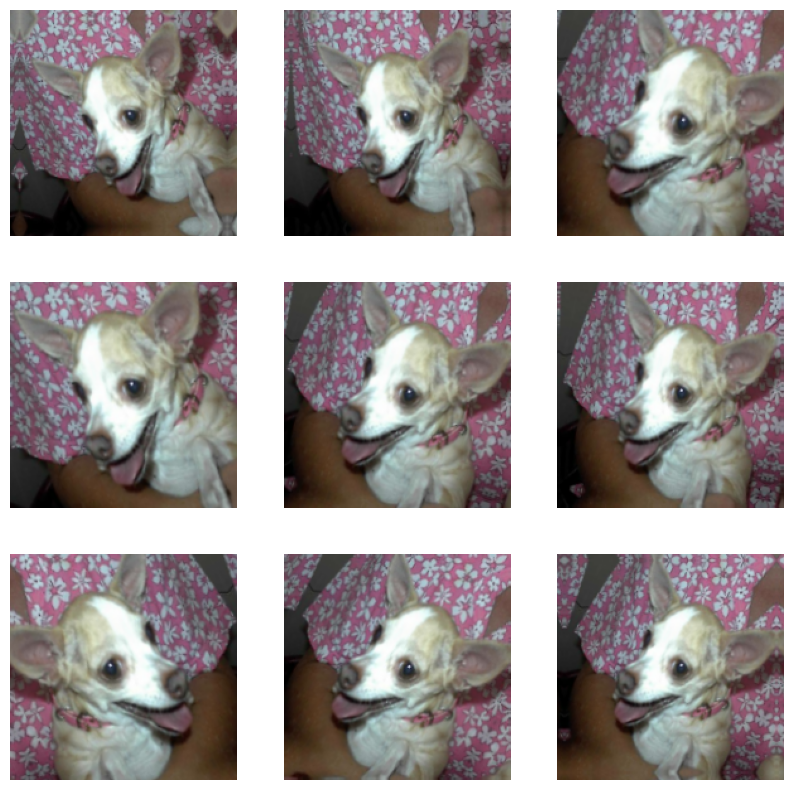

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

Model - 2 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]



Model_2 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/30
32/32 [==============================] - 7s 120ms/step - loss: 0.6958 - accuracy: 0.4990 - val_loss: 0.6884 - val_accuracy: 0.5060
Epoch 2/30
32/32 [==============================] - 4s 95ms/step - loss: 0.6839 - accuracy: 0.5870 - val_loss: 0.6938 - val_accuracy: 0.5100
Epoch 3/30
32/32 [==============================] - 4s 111ms/step - loss: 0.6802 - accuracy: 0.5790 - val_loss: 0.6797 - val_accuracy: 0.5040
Epoch 4/30
32/32 [==============================] - 2s 59ms/step - loss: 0.6817 - accuracy: 0.5470 - val_loss: 0.6891 - val_accuracy: 0.5100
Epoch 5/30
32/32 [==============================] - 2s 60ms/step - loss: 0.6596 - accuracy: 0.5940 - val_loss: 0.6882 - val_accuracy: 0.5120
Epoch 6/30
32/32 [==============================] - 6s 170ms/step - loss: 0.6685 - accuracy: 0.5740 - val_loss: 0.6723 - val_accuracy: 0.5940
Epoch 7/30
32/32 [==============================] - 4s 110ms/step - loss: 0.6516 - accuracy: 0.6240 - val_loss: 0.6255 - val_accuracy: 0.6380
Epoch 8/3

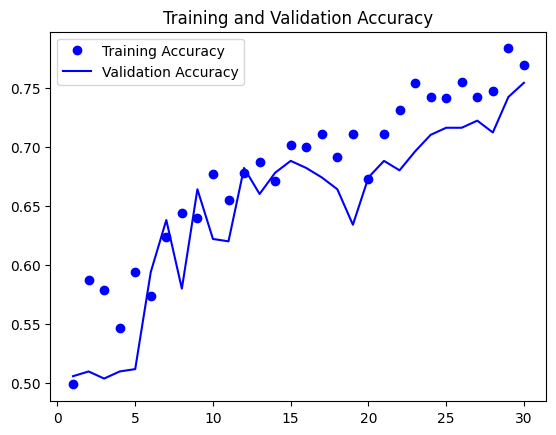

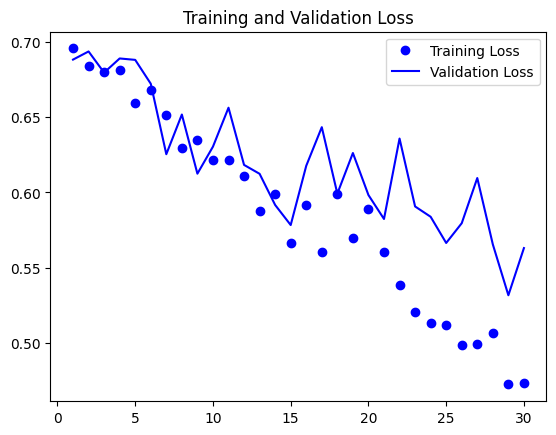

In [ ]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 25ms/step - loss: 0.6009 - accuracy: 0.6940
Loss: 0.601
Test accuracy: 0.694


Model - 3 MaxPooling Operation with Increase in filters from 32 to 512 in 6 Input Layers with the use of Augmented Images and Dropout rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]


# Model Fit
Model_3 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks)


Epoch 1/30
32/32 [==============================] - 10s 199ms/step - loss: 0.7254 - accuracy: 0.5130 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 4s 130ms/step - loss: 0.6946 - accuracy: 0.4810 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 4s 120ms/step - loss: 0.6931 - accuracy: 0.5030 - val_loss: 0.6924 - val_accuracy: 0.5820
Epoch 4/30
32/32 [==============================] - 7s 199ms/step - loss: 0.6919 - accuracy: 0.5220 - val_loss: 0.6888 - val_accuracy: 0.5800
Epoch 5/30
32/32 [==============================] - 4s 120ms/step - loss: 0.6826 - accuracy: 0.5600 - val_loss: 0.6867 - val_accuracy: 0.5360
Epoch 6/30
32/32 [==============================] - 4s 133ms/step - loss: 0.6900 - accuracy: 0.5440 - val_loss: 0.6810 - val_accuracy: 0.5000
Epoch 7/30
32/32 [==============================] - 2s 71ms/step - loss: 0.6925 - accuracy: 0.4930 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 

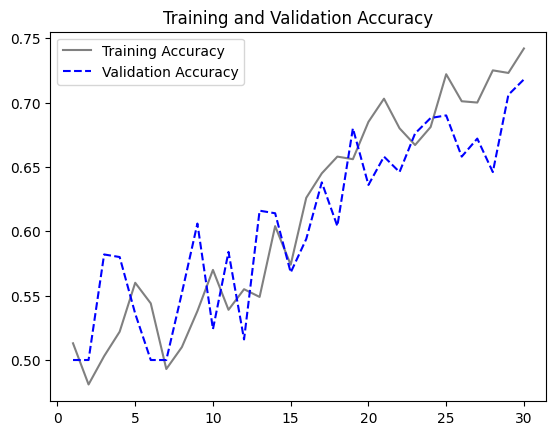

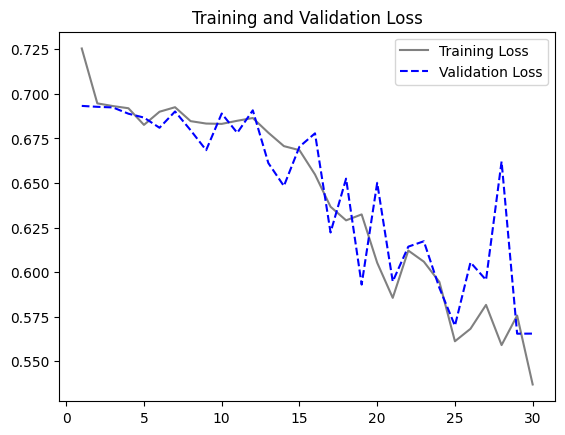

In [ ]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 24ms/step - loss: 0.6076 - accuracy: 0.7000
Loss: 0.608
Test accuracy: 0.700


Model - 4 MaxPooling Operation with Increase in filters from 64 to 1024 in 5 Input Layers with the use of Augmented Images and Dropout rate of 0.6

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 89, 89, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 87, 87, 128)       73856     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 30,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/30
32/32 [==============================] - 16s 274ms/step - loss: 0.6980 - accuracy: 0.4930 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 6s 164ms/step - loss: 0.6940 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 5s 162ms/step - loss: 0.6936 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 7s 224ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 6s 179ms/step - loss: 0.6814 - accuracy: 0.5660 - val_loss: 0.6763 - val_accuracy: 0.5420
Epoch 6/30
32/32 [==============================] - 4s 104ms/step - loss: 0.6935 - accuracy: 0.5230 - val_loss: 0.6853 - val_accuracy: 0.5620
Epoch 7/30
32/32 [==============================] - 5s 129ms/step - loss: 0.6741 - accuracy: 0.5540 - val_loss: 0.7857 - val_accuracy: 0.5240
Epoch

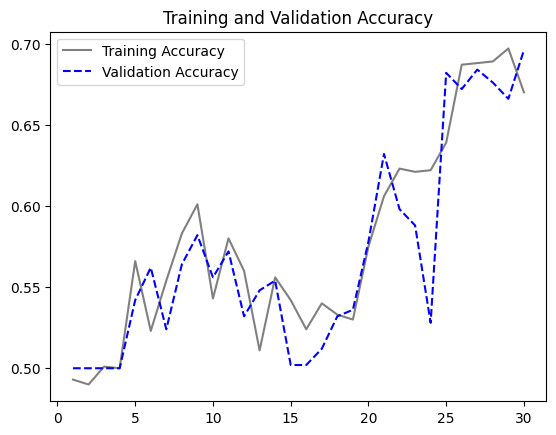

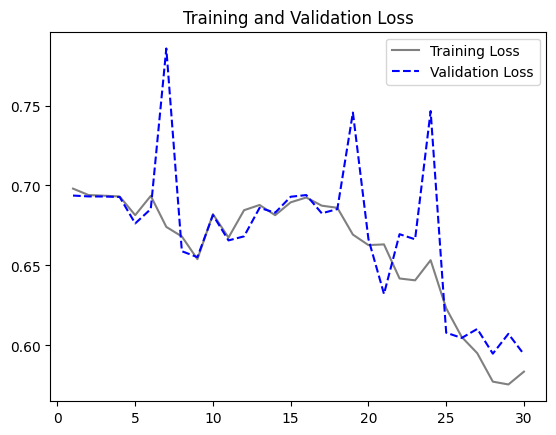

In [ ]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 30ms/step - loss: 0.6725 - accuracy: 0.6460
Loss: 0.672
Test accuracy: 0.646


Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?



Upon condiering the 4 models with the training sample of 1000, we could see the loss and accuracy as below

Model 1
Loss: 0.643
Test accuracy: 0.650
Model 2
Loss: 0.601
Test accuracy: 0.694
Model 3
Loss: 0.608
Test accuracy: 0.700
Model 4
Loss: 0.672
Test accuracy: 0.646
**Model 3 has highest accuracy about 70.0% and loss of 60.8%**

In [ ]:
Model_1 = (0.643, 0.650)
Model_2 = (0.601, 0.694)
Model_3 = (0.608, 0.700)
Model_4 = (0.672, 0.646)

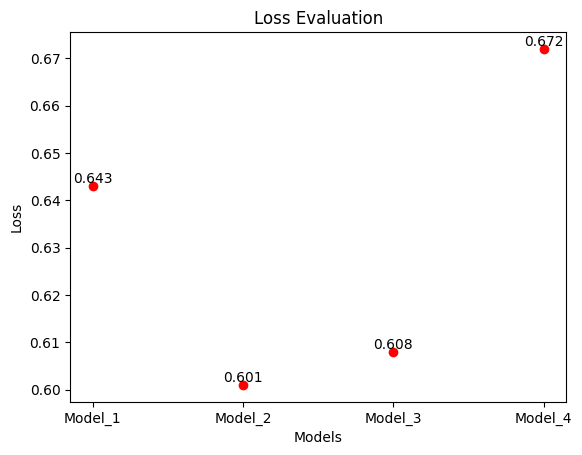

In [ ]:
Models = ("Model_1","Model_2","Model_3","Model_4")
Loss = (Model_1[0],Model_2[0],Model_3[0],Model_4[0])
Accuracy = (Model_1[1],Model_2[1],Model_3[1],Model_4[1])

plt.scatter(Models,Loss,color="red")
plt.title("Loss Evaluation")
plt.ylabel("Loss")
plt.xlabel("Models")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

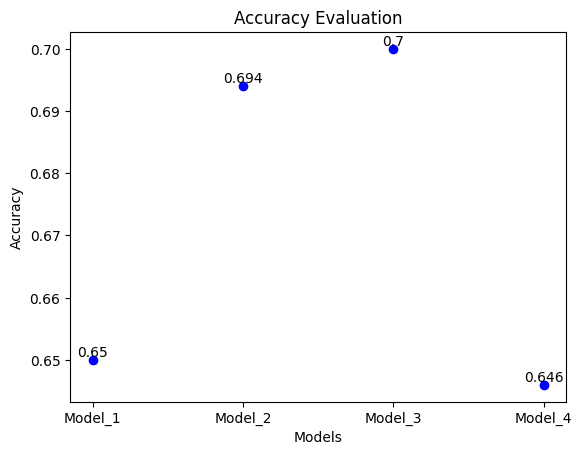

In [ ]:
plt.scatter(Models,Accuracy,color="blue")
plt.title("Accuracy Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Models")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

Model - 5 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

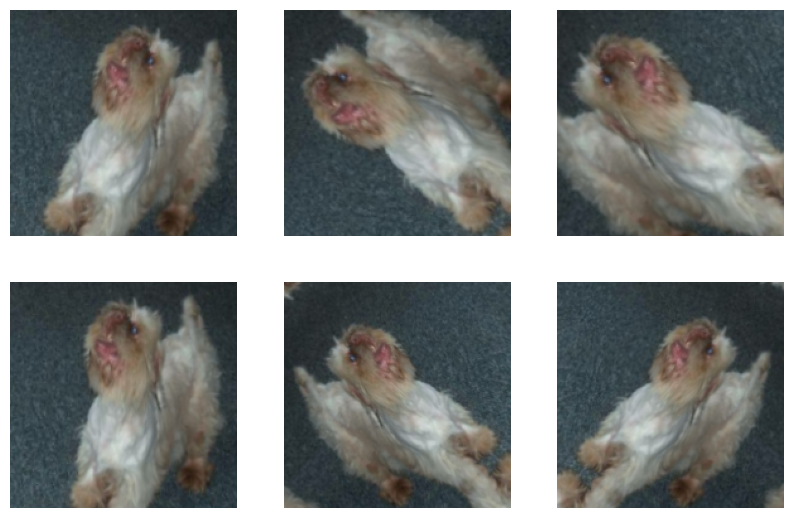

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(6):
      augmented_images = data_augmentation_1(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

Increasing the Training sample from 1000 to 2000 and filters from 32 to 256 in 5 Input layers

Double-click (or enter) to edit

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])

# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch1.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_5 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 11s 120ms/step - loss: 0.6909 - accuracy: 0.5210 - val_loss: 0.6776 - val_accuracy: 0.6020
Epoch 2/50
63/63 [==============================] - 3s 51ms/step - loss: 0.6848 - accuracy: 0.5675 - val_loss: 0.6803 - val_accuracy: 0.5960
Epoch 3/50
63/63 [==============================] - 8s 119ms/step - loss: 0.6738 - accuracy: 0.5795 - val_loss: 0.6506 - val_accuracy: 0.6460
Epoch 4/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6413 - accuracy: 0.6375 - val_loss: 0.6155 - val_accuracy: 0.6680
Epoch 5/50
63/63 [==============================] - 3s 51ms/step - loss: 0.6263 - accuracy: 0.6570 - val_loss: 0.6369 - val_accuracy: 0.6480
Epoch 6/50
63/63 [==============================] - 8s 131ms/step - loss: 0.6197 - accuracy: 0.6695 - val_loss: 0.5968 - val_accuracy: 0.6880
Epoch 7/50
63/63 [==============================] - 3s 51ms/step - loss: 0.6188 - accuracy: 0.6495 - val_loss: 0.6236 - val_accuracy: 0.6740
Epoch 8/5

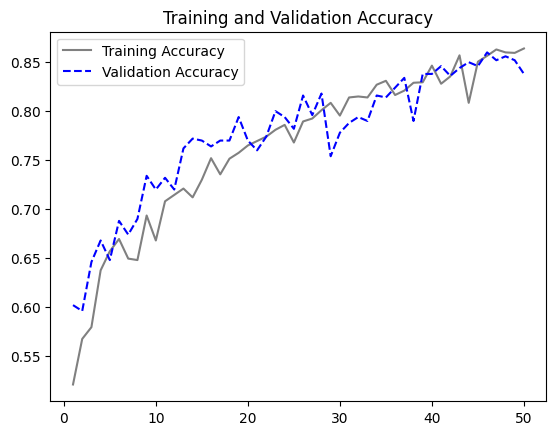

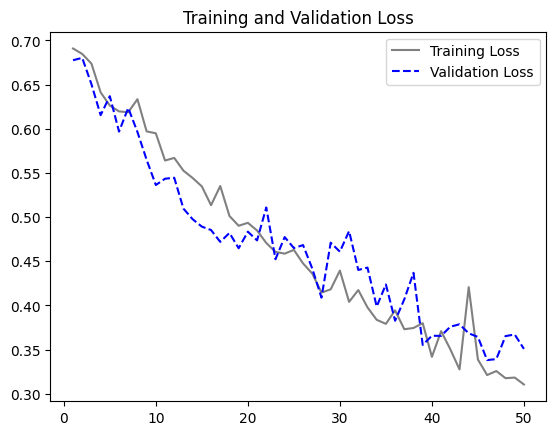

In [ ]:
accuracy = Model_5.history["accuracy"]
val_accuracy = Model_5.history["val_accuracy"]

loss = Model_5.history["loss"]
val_loss = Model_5.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch1.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 23ms/step - loss: 0.4200 - accuracy: 0.8240
Loss: 0.420
Test accuracy: 0.824


Model 2 is built with 1000 samples and it resulted in 74% accuracy and further increasing in the training samples to 2000 increased the accuracy to almost 81.2 % thats an increase in 7%

RMSProp is an adaptive learning rate optimizer that improves on AdaGrad by normalizing the gradient updates. This makes it less sensitive to the scale of the gradients and can help to prevent oscillations. Adam is another adaptive learning rate optimizer that combines the best of RMSProp and momentum. It is generally considered to be the most robust and effective optimizer for deep learning.

Model - 6 Strides Operation with Padding being "Same" with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_1(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, strides=2, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 90, 90, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 23, 23, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 256)       2951

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch1.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_6 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
63/63 [==============================] - 11s 124ms/step - loss: 0.6944 - accuracy: 0.4860 - val_loss: 0.6926 - val_accuracy: 0.5060
Epoch 2/50
63/63 [==============================] - 5s 71ms/step - loss: 0.6955 - accuracy: 0.5265 - val_loss: 0.6881 - val_accuracy: 0.5620
Epoch 3/50
63/63 [==============================] - 3s 45ms/step - loss: 0.6928 - accuracy: 0.5175 - val_loss: 0.6909 - val_accuracy: 0.5760
Epoch 4/50
63/63 [==============================] - 8s 118ms/step - loss: 0.6924 - accuracy: 0.5475 - val_loss: 0.6837 - val_accuracy: 0.5380
Epoch 5/50
63/63 [==============================] - 5s 77ms/step - loss: 0.6891 - accuracy: 0.5595 - val_loss: 0.6824 - val_accuracy: 0.5560
Epoch 6/50
63/63 [==============================] - 5s 70ms/step - loss: 0.6825 - accuracy: 0.5740 - val_loss: 0.6744 - val_accuracy: 0.5780
Epoch 7/50
63/63 [==============================] - 6s 83ms/step - loss: 0.6792 - accuracy: 0.5815 - val_loss: 0.6779 - val_accuracy: 0.5840
Epoch 8/50

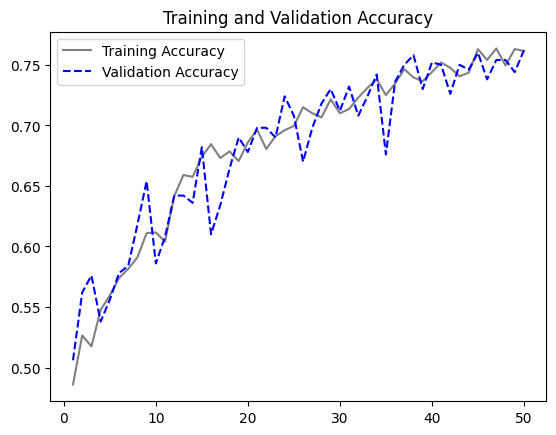

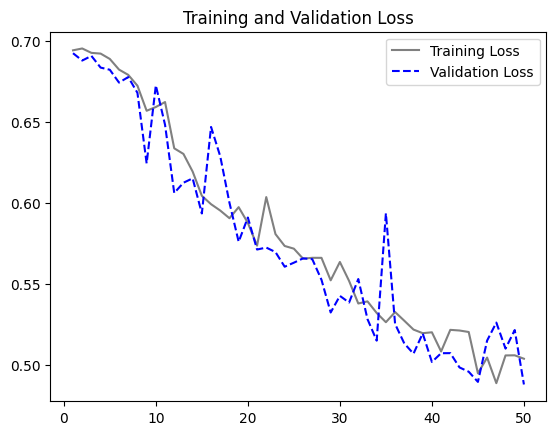

In [ ]:
accuracy = Model_6.history["accuracy"]
val_accuracy = Model_6.history["val_accuracy"]

loss = Model_6.history["loss"]
val_loss = Model_6.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch1.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 22ms/step - loss: 0.5831 - accuracy: 0.7160
Loss: 0.583
Test accuracy: 0.716


Using Strides = 2 does afftect the performance if the model and the accuracy has dropped from 81% to 58%

The loss of 0.691 and test accuracy of 0.582 are relatively high, suggesting that the model is not performing well. Turning on strides with padding may help to improve the performance of the model, as it can help to reduce overfitting and improve the generalization ability of the model.

Strides are used to downsample the feature maps during convolution operations. When strides are used, the output feature map is smaller than the input feature map. This can help to reduce the number of parameters in the model and improve the computational efficiency. However, using strides can also lead to overfitting, as the model may learn to focus on specific features in the training data that are not present in the test data.

In [ ]:
Model_5 = (0.420,0.824)
Model_6 = (0.583,0.716)

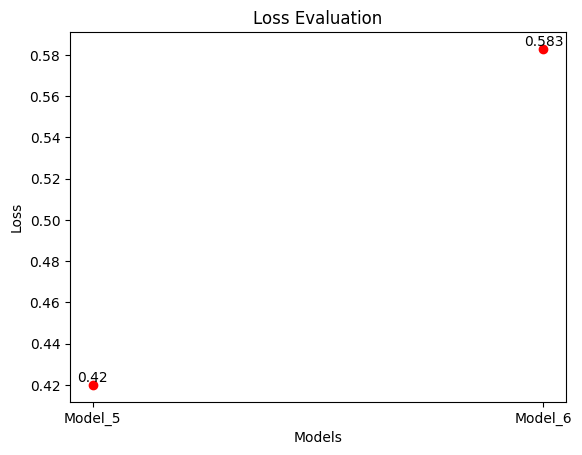

In [ ]:
Models = ("Model_5","Model_6")
Loss = (Model_5[0], Model_6[0])
Accuracy = (Model_5[1], Model_6[1])

plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

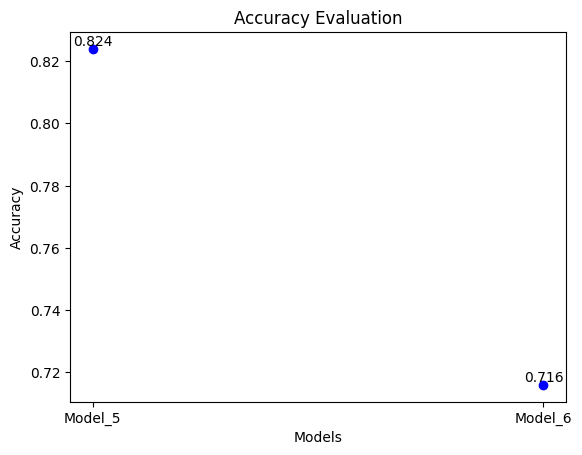

In [ ]:
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

Increasing the Sample to 3000

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
data_augmentation_2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

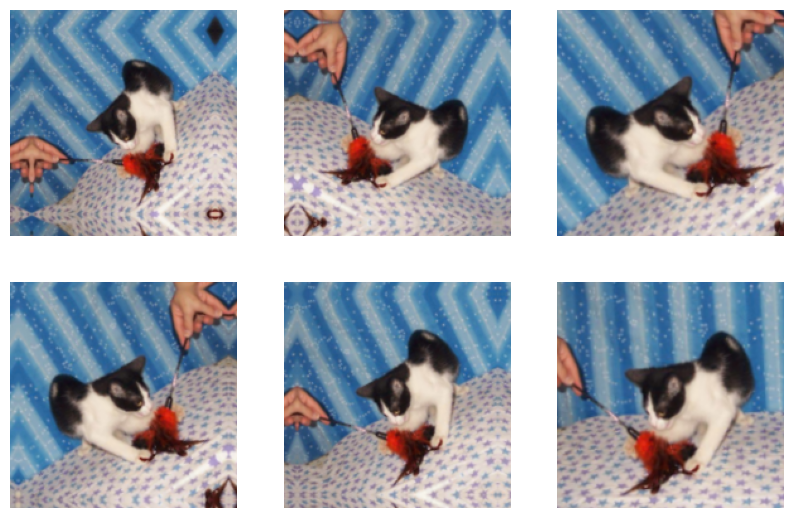

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(6):
      augmented_images = data_augmentation_2(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

Training Sample - 3000 Model 7 Max Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])



# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch2.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]

# Model Fit
Model_7 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 13s 112ms/step - loss: 0.6948 - accuracy: 0.5177 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/50
94/94 [==============================] - 7s 73ms/step - loss: 0.6935 - accuracy: 0.5047 - val_loss: 0.6920 - val_accuracy: 0.5680
Epoch 3/50
94/94 [==============================] - 8s 85ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 4/50
94/94 [==============================] - 5s 48ms/step - loss: 0.6942 - accuracy: 0.5060 - val_loss: 0.6929 - val_accuracy: 0.5060
Epoch 5/50
94/94 [==============================] - 6s 63ms/step - loss: 0.6944 - accuracy: 0.5070 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 6/50
94/94 [==============================] - 7s 65ms/step - loss: 0.6937 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
94/94 [==============================] - 5s 48ms/step - loss: 0.6933 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50


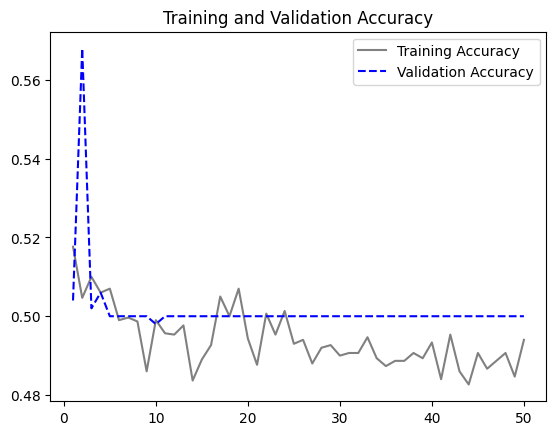

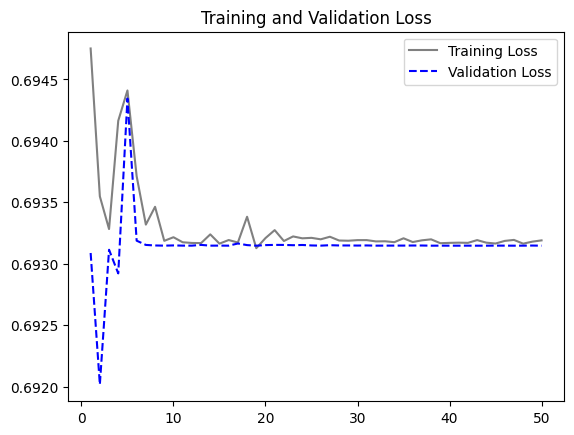

In [ ]:
accuracy = Model_7.history["accuracy"]
val_accuracy = Model_7.history["val_accuracy"]

loss = Model_7.history["loss"]
val_loss = Model_7.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch2.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 22ms/step - loss: 0.6929 - accuracy: 0.5420
Loss: 0.693
Test accuracy: 0.542


Using 7 MaxPooling operations with an increase in filters from 32 to 256 in 5 input layers is a common architecture for convolutional neural networks (CNNs). This architecture is designed to extract high-level features from images, which can then be used to classify the images or perform other tasks

Model 8 MaxPooling + Strides of Step-Size 2 Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch2.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]


# Model Fit
Model_8 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 12s 96ms/step - loss: 0.6947 - accuracy: 0.4927 - val_loss: 0.6903 - val_accuracy: 0.5020
Epoch 2/50
94/94 [==============================] - 6s 65ms/step - loss: 0.6940 - accuracy: 0.5123 - val_loss: 0.6896 - val_accuracy: 0.5200
Epoch 3/50
94/94 [==============================] - 5s 53ms/step - loss: 0.6942 - accuracy: 0.4860 - val_loss: 0.6929 - val_accuracy: 0.5080
Epoch 4/50
94/94 [==============================] - 5s 48ms/step - loss: 0.6935 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
94/94 [==============================] - 6s 66ms/step - loss: 0.6934 - accuracy: 0.4940 - val_loss: 0.6914 - val_accuracy: 0.5240
Epoch 6/50
94/94 [==============================] - 5s 49ms/step - loss: 0.6926 - accuracy: 0.5277 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 7/50
94/94 [==============================] - 9s 99ms/step - loss: 0.6847 - accuracy: 0.5407 - val_loss: 0.6460 - val_accuracy: 0.6440
Epoch 8/50
9

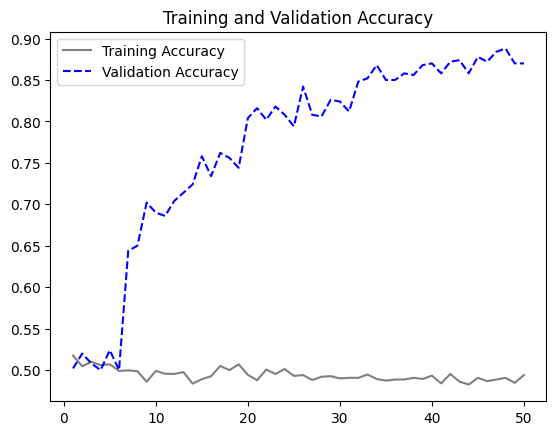

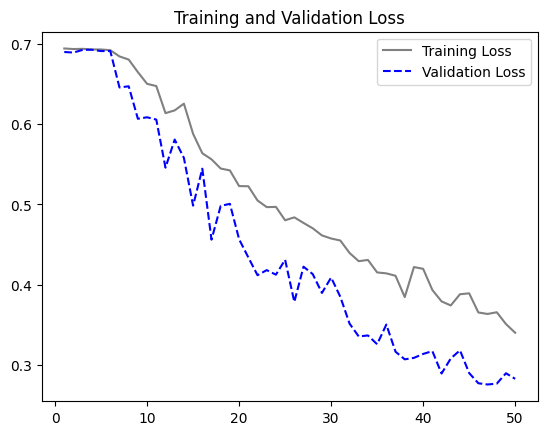

In [ ]:
ccuracy = Model_8.history["accuracy"]
val_accuracy = Model_8.history["val_accuracy"]

loss = Model_8.history["loss"]
val_loss = Model_8.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch2.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")


16/16 [==============================] - 1s 25ms/step - loss: 0.4349 - accuracy: 0.8060
Loss: 0.435
Test accuracy: 0.806


The loss of 0.435 and test accuracy of 0.806 are also good results, suggesting that the model is performing well. Using MaxPooling with strides of step size 2 is a common technique for reducing the spatial dimensions of feature maps. This can help to improve the computational efficiency of the model and prevent overfitting.

Model - 9 MaxPooling + Strides of Step-Size 2 with Padding turned on Operation with Increase in filters from 32 to 512 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation_2(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2,strides=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Saving the results of the model
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch2.tf",
    save_best_only=True,
    monitor="val_loss",
    save_format="tf")
]


# Model Fit
Model_9 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
94/94 [==============================] - 12s 88ms/step - loss: 0.7034 - accuracy: 0.5040 - val_loss: 0.6911 - val_accuracy: 0.6280
Epoch 2/50
94/94 [==============================] - 10s 104ms/step - loss: 0.6905 - accuracy: 0.5210 - val_loss: 0.6849 - val_accuracy: 0.5460
Epoch 3/50
94/94 [==============================] - 12s 120ms/step - loss: 0.6900 - accuracy: 0.5220 - val_loss: 0.6758 - val_accuracy: 0.5860
Epoch 4/50
94/94 [==============================] - 7s 72ms/step - loss: 0.6813 - accuracy: 0.5567 - val_loss: 0.6552 - val_accuracy: 0.5680
Epoch 5/50
94/94 [==============================] - 6s 61ms/step - loss: 0.6774 - accuracy: 0.5617 - val_loss: 0.6847 - val_accuracy: 0.5340
Epoch 6/50
94/94 [==============================] - 7s 66ms/step - loss: 0.6762 - accuracy: 0.5650 - val_loss: 0.6640 - val_accuracy: 0.6220
Epoch 7/50
94/94 [==============================] - 6s 66ms/step - loss: 0.6506 - accuracy: 0.6100 - val_loss: 0.6126 - val_accuracy: 0.6940
Epoch 8/

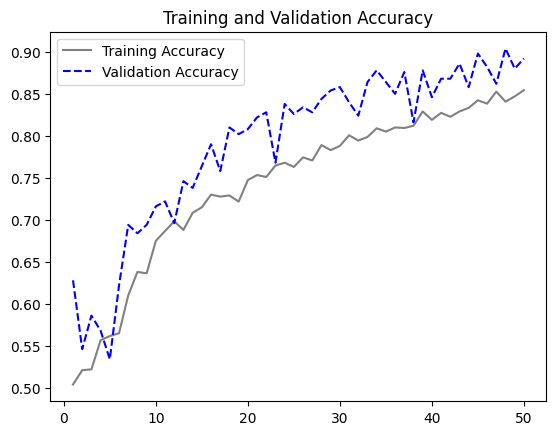

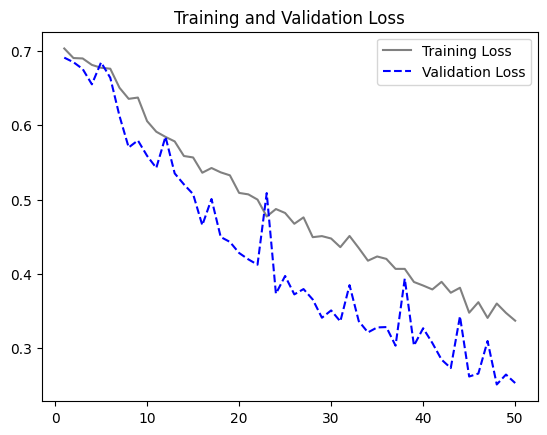

In [ ]:
accuracy = Model_9.history["accuracy"]
val_accuracy = Model_9.history["val_accuracy"]

loss = Model_9.history["loss"]
val_loss = Model_9.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch2.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Loss: {test_loss:.3f}')
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 39ms/step - loss: 0.4379 - accuracy: 0.8340
Loss: 0.438
Test accuracy: 0.834


In [ ]:
Model_7 = (0.693,0.542)
Model_8 = (0.435,0.806)
Model_9 = (0.438,0.834)

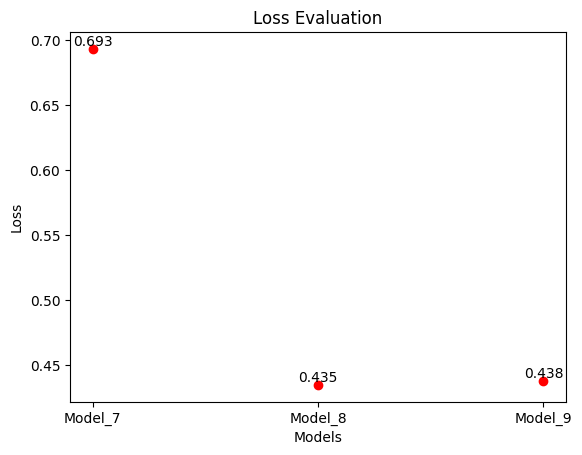

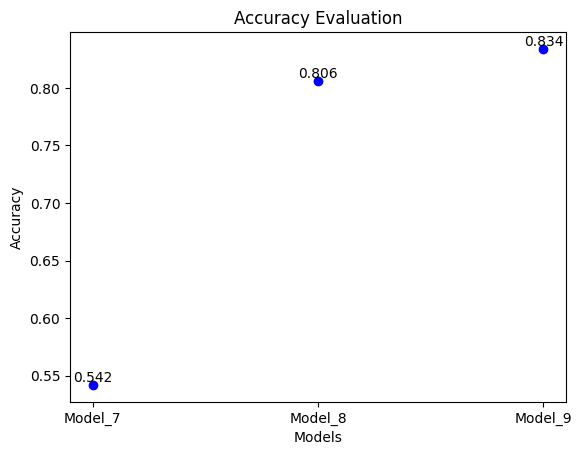

In [ ]:
Models = ("Model_7","Model_8","Model_9")
Loss = (Model_7[0], Model_8[0],Model_9[0])
Accuracy = (Model_7[1], Model_8[1],Model_9[1])

# Loss Evaluation
plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

# Accuracy Evaluation
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

model 10

In [ ]:
#Looking at all the models performances

Model_1 = (0.643,0.650)
Model_2 = (0.601,0.694)
Model_3 = (0.608,0.700)
Model_4 = (0.672,0.646)
Model_5 = (0.420,0.824)
Model_6 = (0.583,0.716)
Model_7 = (0.693,0.542)
Model_8 = (0.435,0.806)
Model_9 = (0.438,0.834)

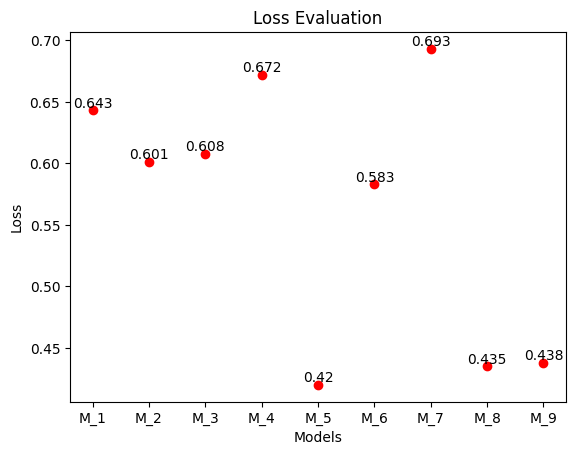

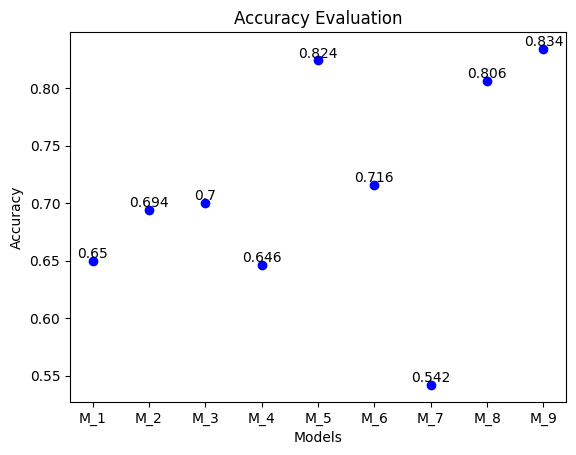

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Models = ("M_1","M_2","M_3","M_4","M_5","M_6","M_7","M_8","M_9")
Loss = (Model_1[0], Model_2[0],Model_3[0],Model_4[0],Model_5[0],Model_6[0],Model_7[0],Model_8[0],Model_9[0])
Accuracy = (Model_1[1], Model_2[1],Model_3[1],Model_4[1],Model_5[1],Model_6[1],Model_7[1],Model_8[1],Model_9[1])

# Loss Evaluation
plt.scatter(Models, Loss, color="red")
plt.title("Loss Evaluation")
plt.xlabel("Models")
plt.ylabel("Loss")

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

# Accuracy Evaluation
plt.scatter(Models, Accuracy, color="blue")
plt.title("Accuracy Evaluation")
plt.xlabel("Models")
plt.ylabel("Accuracy")

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()


Model 7 (MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5) has the lowest loss (0.410) and the highest accuracy (0.850) out of all the models



In [ ]:
%%shell
jupyter nbconvert --to html /%%shell
jupyter nbconvert --to html //content/sample_data/Assignment_2_Scrath_group15_ (2).ipynb

[NbConvertApp] WARNING | pattern '/%%shell' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute 

CalledProcessError: Command 'jupyter nbconvert --to html /%%shell
jupyter nbconvert --to html //content/sample_data/Assignment_2_Scrath_group15_ (2).ipynb
' returned non-zero exit status 2.